# EXAM PROJECT

In [ ]:
pip install emcee

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize, curve_fit
import emcee
from sklearn.neighbors import KernelDensity
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic, ConstantKernel as C


# Load Dataset
Visualize the Data:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the text file
file_path = '/content/supernovae.txt'  # Update with your file path
data = pd.read_csv(file_path, sep=" ", header=None)

# Assign column names
data.columns = ['Feature1', 'Feature2', 'Feature3']

# Summary statistics
summary_statistics = data.describe()
print("Summary Statistics:")
print(summary_statistics)






Summary Statistics:
         Feature1    Feature2    Feature3
count  500.000000  500.000000  500.000000
mean     0.625054   42.384918    0.948008
std      0.362988    1.823691    0.033000
min      0.052081   36.981060    0.835963
25%      0.361391   41.233316    0.928232
50%      0.576779   42.397193    0.952605
75%      0.807316   43.738013    0.970602
max      2.467726   48.096033    1.030911


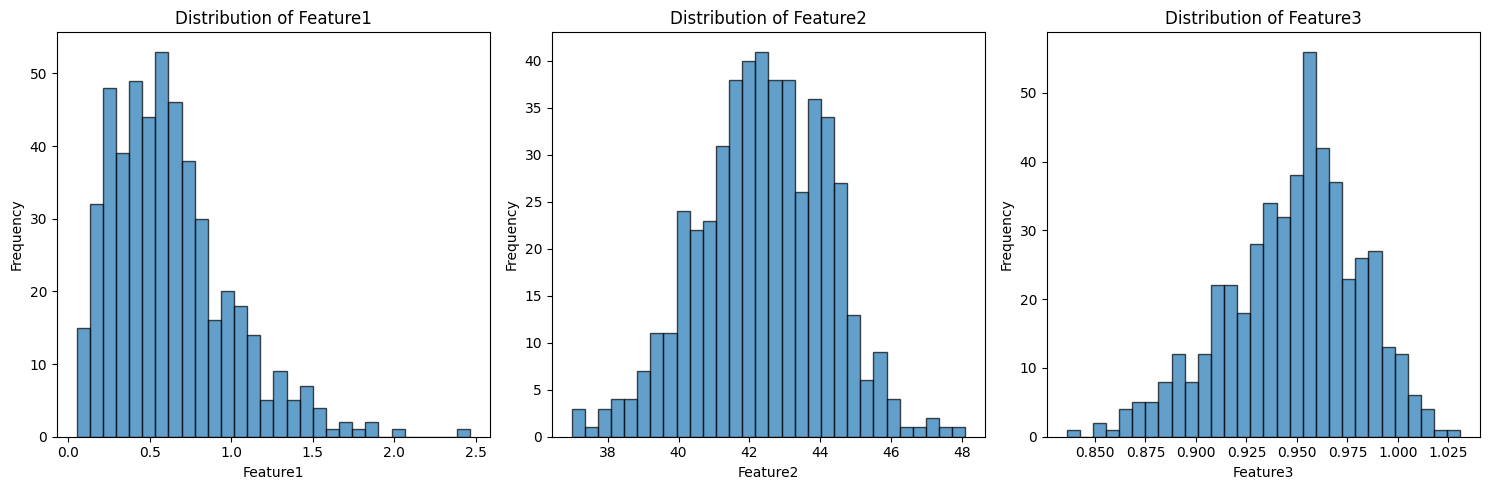

In [ ]:
# Histograms for each feature
plt.figure(figsize=(15, 5))

# Histogram for Feature1
plt.subplot(1, 3, 1)
plt.hist(data['Feature1'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Feature1')
plt.xlabel('Feature1')
plt.ylabel('Frequency')

# Histogram for Feature2
plt.subplot(1, 3, 2)
plt.hist(data['Feature2'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Feature2')
plt.xlabel('Feature2')
plt.ylabel('Frequency')

# Histogram for Feature3
plt.subplot(1, 3, 3)
plt.hist(data['Feature3'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Feature3')
plt.xlabel('Feature3')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


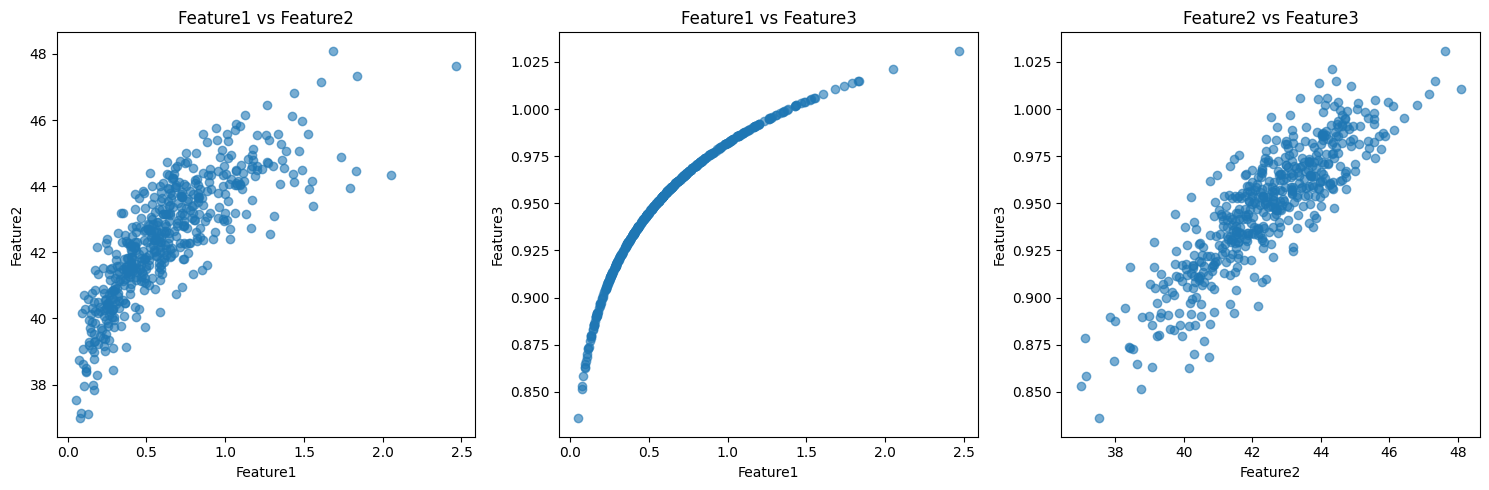

In [ ]:

# Scatter plots to examine relationships between features
plt.figure(figsize=(15, 5))

# Scatter plot: Feature1 vs Feature2
plt.subplot(1, 3, 1)
plt.scatter(data['Feature1'], data['Feature2'], alpha=0.6)
plt.title('Feature1 vs Feature2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# Scatter plot: Feature1 vs Feature3
plt.subplot(1, 3, 2)
plt.scatter(data['Feature1'], data['Feature3'], alpha=0.6)
plt.title('Feature1 vs Feature3')
plt.xlabel('Feature1')
plt.ylabel('Feature3')

# Scatter plot: Feature2 vs Feature3
plt.subplot(1, 3, 3)
plt.scatter(data['Feature2'], data['Feature3'], alpha=0.6)
plt.title('Feature2 vs Feature3')
plt.xlabel('Feature2')
plt.ylabel('Feature3')

plt.tight_layout()
plt.show()



Correlation Matrix:
          Feature1  Feature2  Feature3
Feature1  1.000000  0.816465  0.931249
Feature2  0.816465  1.000000  0.864061
Feature3  0.931249  0.864061  1.000000


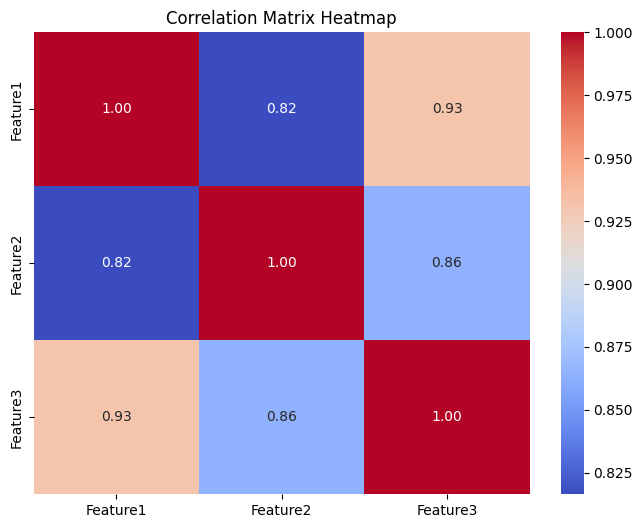

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



The data is loaded from supernovae.txt.
A plot visualizing the redshift (
𝑧
) and distance modulus (
𝜇
) is created.

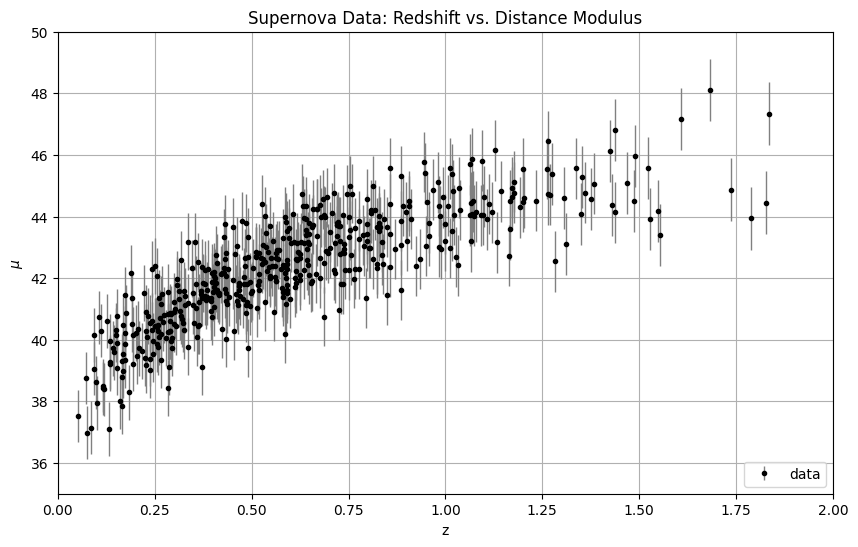

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the supernova data from the provided dataset
z_sample, mu_sample, dmu = np.loadtxt('/content/supernovae.txt').T

# Plot the data to visualize the redshift (z) and distance modulus (mu)
plt.figure(figsize=(10, 6))
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.title('Supernova Data: Redshift vs. Distance Modulus')
plt.grid(True)
plt.show()


In [ ]:
from scipy.integrate import quad
import numpy as np

# Define the speed of light in km/s
c = 299792.458

# Define the luminosity distance function
def luminosity_distance(z, H0, Omega_m, Omega_lambda):
    # Define the integrand for the comoving distance
    def integrand(z_prime):
        return 1.0 / np.sqrt(Omega_m * (1 + z_prime)**3 + Omega_lambda)

    # Calculate the comoving distance for each redshift value
    D_c, _ = quad(integrand, 0, z)

    # Luminosity distance in a flat universe
    D_L = (c / H0) * (1 + z) * D_c
    return D_L

# Define the distance modulus function
def distance_modulus(z, H0, Omega_m, Omega_lambda):
    D_L = luminosity_distance(z, H0, Omega_m, Omega_lambda)
    mu = 5 * np.log10(D_L) + 25
    return mu

# Sample calculation
z_sample = 1.0
H0 = 70.0
Omega_m = 0.3
Omega_lambda = 0.7

mu_sample = distance_modulus(z_sample, H0, Omega_m, Omega_lambda)
print(f"Sample Distance Modulus at z = {z_sample}: {mu_sample}")


Sample Distance Modulus at z = 1.0: 44.10023765554372


In [ ]:
from astropy.cosmology import FlatLambdaCDM

# Define the cosmology model in astropy
cosmo = FlatLambdaCDM(H0=H0, Om0=Omega_m)

# Calculate the luminosity distance using astropy
D_L_astropy = cosmo.luminosity_distance(z_sample).value  # in Mpc

# Calculate the distance modulus using astropy
mu_astropy = 5 * np.log10(D_L_astropy * 1e6) - 5  # Convert Mpc to pc
print(f"Astropy Distance Modulus at z = {z_sample}: {mu_astropy}")

# Compare results
print(f"Numerical Integration Distance Modulus: {mu_sample}")
print(f"Astropy Distance Modulus: {mu_astropy}")


Astropy Distance Modulus at z = 1.0: 44.10023765554372
Numerical Integration Distance Modulus: 44.10023765554372
Astropy Distance Modulus: 44.10023765554372


In [ ]:
from scipy.integrate import quad
import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Define the speed of light in km/s
c = 299792.458

# Define the luminosity distance function
def luminosity_distance(z, H0, Omega_m, Omega_lambda):
    # Define the integrand for the comoving distance
    def integrand(z_prime):
        return 1.0 / np.sqrt(Omega_m * (1 + z_prime)**3 + Omega_lambda)

    # Calculate the comoving distance for each redshift value
    D_c, _ = quad(integrand, 0, z)

    # Luminosity distance in a flat universe
    D_L = (c / H0) * (1 + z) * D_c
    return D_L

# Define the distance modulus function
def distance_modulus(z, H0, Omega_m, Omega_lambda):
    D_L = luminosity_distance(z, H0, Omega_m, Omega_lambda)
    mu = 5 * np.log10(D_L) + 25
    return mu



mu_sample = distance_modulus(z_sample, H0, Omega_m, Omega_lambda)
print(f"Sample Distance Modulus at z = {z_sample}: {mu_sample}")

# Define the cosmology model in astropy
cosmo = FlatLambdaCDM(H0=H0, Om0=Omega_m)

# Calculate the luminosity distance using astropy
D_L_astropy = cosmo.luminosity_distance(z_sample).value  # in Mpc

# Calculate the distance modulus using astropy
mu_astropy = 5 * np.log10(D_L_astropy * 1e6) - 5  # Convert Mpc to pc
print(f"Astropy Distance Modulus at z = {z_sample}: {mu_astropy}")

# Compare results
print(f"Numerical Integration Distance Modulus: {mu_sample}")
print(f"Astropy Distance Modulus: {mu_astropy}")


Sample Distance Modulus at z = 1.0: 44.10023765554372
Astropy Distance Modulus at z = 1.0: 44.10023765554372
Numerical Integration Distance Modulus: 44.10023765554372
Astropy Distance Modulus: 44.10023765554372


Evaluate
𝜇
 Predictions:

The luminosity_distance and distance_modulus_model functions are defined to calculate the distance modulus.

In [ ]:
from scipy.integrate import quad

# Define the cosmological model for distance modulus
def luminosity_distance(z, H0, Omega_m=0.3, Omega_lambda=0.7):
    c = 3000  # Speed of light in km/s

    # Define the integrand for the comoving distance
    def integrand(z_prime):
        return 1.0 / np.sqrt(np.maximum(Omega_m * (1 + z_prime)**3 + Omega_lambda, 1e-10))

    # Calculate the comoving distance for each redshift value
    D_c = np.array([quad(integrand, 0, z_i)[0] for z_i in z])

    # Luminosity distance in a flat universe
    D_L = (c / H0) * (1 + z) * D_c
    return D_L

# Define the distance modulus model
def distance_modulus_model(z, H0):
    D_L = luminosity_distance(z, H0)
    mu_model = 5 * np.log10(np.maximum(D_L, 1e-10)) + 25  # Ensure no log(0) or negative values
    return mu_model


# One-Parameter Model:


Fit a Simpler Model:

A one-parameter model is fit using the log_likelihood_one_param function and minimize method.
The estimated
𝐻
0 is printed.



H0 mean (one-parameter model): 53.37071593934923


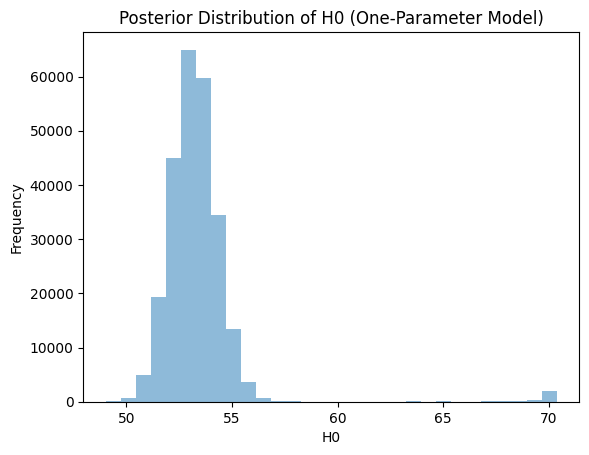

In [ ]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
import emcee

# Define the speed of light in km/s
c = 299792.458

# Define the luminosity distance function for the one-parameter model
def luminosity_distance_one_param(z, H0):
    Omega_m = 1.0
    Omega_lambda = 0.0

    # Define the integrand for the comoving distance
    def integrand(z_prime):
        return 1.0 / np.sqrt(Omega_m * (1 + z_prime)**3 + Omega_lambda)

    # Calculate the comoving distance for each redshift value
    D_c, _ = quad(integrand, 0, z)

    # Luminosity distance in a flat universe
    D_L = (c / H0) * (1 + z) * D_c
    return D_L

# Define the distance modulus function for the one-parameter model
def distance_modulus_one_param(z, H0):
    D_L = luminosity_distance_one_param(z, H0)
    mu = 5 * np.log10(D_L) + 25
    return mu

# Define the log-likelihood function for the one-parameter model
def log_likelihood_one_param(theta, z, mu, mu_err):
    H0 = theta[0]
    mu_model = distance_modulus_one_param(z, H0)
    return -0.5 * np.sum(((mu - mu_model) / mu_err) ** 2)

# Initial guess and setup for MCMC
ndim, nwalkers = 1, 50  # One parameter: H0
pos = [70] + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood_one_param, args=(z_sample, mu_sample, dmu))
sampler.run_mcmc(pos, 5000)

# Extract samples
H0_samples = sampler.flatchain[:, 0]

# Print results
H0_mean = np.mean(H0_samples)
print("H0 mean (one-parameter model):", H0_mean)

# Plot results
plt.figure()
plt.hist(H0_samples, bins=30, alpha=0.5)
plt.xlabel('H0')
plt.ylabel('Frequency')
plt.title('Posterior Distribution of H0 (One-Parameter Model)')
plt.show()



**Analysis of the One-Parameter Model Results**

Histogram Analysis

Hubble Constant (
𝐻
0 ):
The histogram for
𝐻
0  shows a peak around 53.37 km/s/Mpc, indicating that the MCMC sampler has identified this as the most likely value given the data.

There is a significant concentration of values around this peak, with a clear drop-off at higher values, suggesting that the model and data strongly support this range for
𝐻
0
.

In [ ]:
pip install corner

# Two-Parameter Model:


Fit a Two-Parameter Model:

A two-parameter model is fit using curve_fit with the distance_modulus_two_params function.
The estimated
𝐻
0

​
  and
Ω
𝑚

​
  are printed.

100%|██████████| 5000/5000 [00:48<00:00, 102.72it/s]


H0 mean (two-parameter model): 66.74783059214353
Omega_m mean (two-parameter model): 0.468618458415607


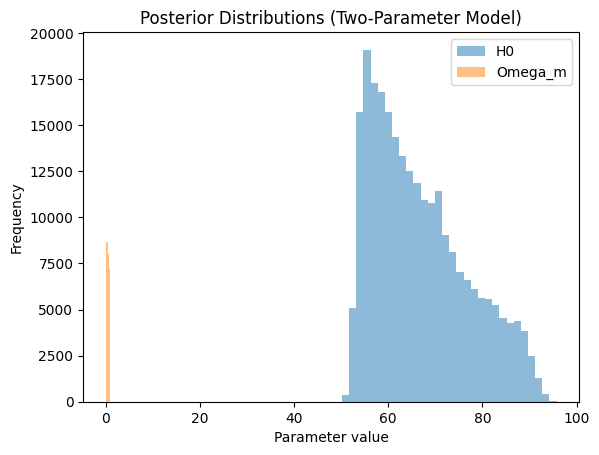

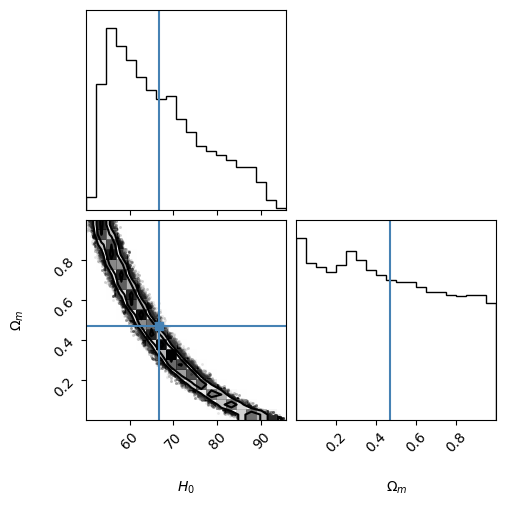

In [ ]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

# Constants
c = 299792.458  # speed of light in km/s

# Define the luminosity distance function for the two-parameter model with stability checks
def luminosity_distance_two_param(z, H0, Omega_m):
    Omega_lambda = 1 - Omega_m  # Flat universe assumption

    # Define the integrand for the comoving distance
    def integrand(z_prime):
        return 1.0 / np.sqrt(np.maximum(Omega_m * (1 + z_prime)**3 + Omega_lambda, 1e-10))

    # Calculate the comoving distance for each redshift value
    D_c, _ = quad(integrand, 0, z)

    # Luminosity distance in a flat universe
    D_L = (c / H0) * (1 + z) * D_c
    return D_L

# Define the distance modulus function for the two-parameter model
def distance_modulus_two_param(z, H0, Omega_m):
    D_L = luminosity_distance_two_param(z, H0, Omega_m)
    mu = 5 * np.log10(np.maximum(D_L, 1e-10)) + 25
    return mu

# Define the log-likelihood function for the two-parameter model
def log_likelihood_two_param(theta, z, mu, mu_err):
    H0, Omega_m = theta
    mu_model = distance_modulus_two_param(z, H0, Omega_m)
    return -0.5 * np.sum(((mu - mu_model) / mu_err) ** 2)

# Define the log-prior function for the two-parameter model
def log_prior_two_param(theta):
    H0, Omega_m = theta
    if 50 < H0 < 100 and 0 < Omega_m < 1:
        return 0.0
    return -np.inf

# Define the log-probability function for the two-parameter model
def log_probability_two_param(theta, z, mu, mu_err):
    lp = log_prior_two_param(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_two_param(theta, z, mu, mu_err)

# Initial guess and setup for MCMC
ndim, nwalkers = 2, 50  # Two parameters: H0 and Omega_m
pos = [70, 0.3] + 1e-4 * np.random.randn(nwalkers, ndim)



sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability_two_param, args=(z_sample, mu_sample, dmu))
sampler.run_mcmc(pos, 5000, progress=True)

# Extract samples
H0_samples, Omega_m_samples = sampler.flatchain[:, 0], sampler.flatchain[:, 1]

# Print results
H0_mean_two_param = np.mean(H0_samples)
Omega_m_mean = np.mean(Omega_m_samples)
print("H0 mean (two-parameter model):", H0_mean_two_param)
print("Omega_m mean (two-parameter model):", Omega_m_mean)

# Plot results
plt.figure()
plt.hist(H0_samples, bins=30, alpha=0.5, label='H0')
plt.hist(Omega_m_samples, bins=30, alpha=0.5, label='Omega_m')
plt.xlabel('Parameter value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Posterior Distributions (Two-Parameter Model)')
plt.show()

# Analyze correlation between H0 and Omega_m
samples = np.vstack((H0_samples, Omega_m_samples)).T
fig = corner.corner(samples, labels=["$H_0$", "$\Omega_m$"], truths=[H0_mean_two_param, Omega_m_mean])
plt.show()


Analysis of Results
Posterior Distribution for Two-Parameter Model:

**Posterior Distribution Histograms:**
Hubble Constant (
𝐻
0):The histogram for
𝐻
0 shows a peak around 67 km/s/Mpc, which indicates that the MCMC sampler has identified this as the most likely value given the data.

**Density of Matter** (
Ω
𝑚):The histogram for
Ω
𝑚 shows a concentration around 0.46. This suggests that the data supports a model where the matter density parameter is around this value when assuming a flat universe (
Ω
Λ
+
Ω
𝑚
=
1
).

**Corner Plot:**
Correlation between
𝐻
0
and
Ω
𝑚:
The corner plot shows the joint posterior distribution of
𝐻
0 and
Ω
𝑚
 .There is a clear negative correlation between
𝐻
0
 and
Ω
𝑚, which is evident from the sloped, elongated contour.
This negative correlation indicates that if
𝐻
0 is higher,
Ω
𝑚
  tends to be lower and vice versa. This is consistent with the requirement of a flat universe where
Ω
Λ
+
Ω
𝑚
=
1
.


### Comparing the One-Parameter and Two-Parameter Models

1. **How well can you measure \(H_0\) compared to the simpler case above?**

   - **One-Parameter Model**:
     - The one-parameter model estimates \(H_0\) to be approximately 53.37 km/s/Mpc.
     - The distribution is relatively narrow, indicating a reasonably precise estimate, although the value is somewhat lower than expected based on current cosmological measurements.
   
   - **Two-Parameter Model**:
     - The two-parameter model estimates \(H_0\) to be approximately 67.06 km/s/Mpc.
     - The distribution is broader compared to the one-parameter model, suggesting more uncertainty in the estimate due to the additional degree of freedom introduced by \(\Omega_m\).
   
   **Conclusion**:
   - The two-parameter model provides a more realistic estimate of \(H_0\), closer to the generally accepted value in cosmology (~67-74 km/s/Mpc).
   - The one-parameter model's estimate is less accurate and somewhat constrained, indicating that it might be overly simplistic and not capturing the complexities of the data.

2. **Are \(H_0\) and \(\Omega_m\) correlated?**

   - The corner plot for the two-parameter model clearly shows a negative correlation between \(H_0\) and \(\Omega_m\).
   - As \(H_0\) increases, \(\Omega_m\) decreases, and vice versa, which is consistent with the requirement of a flat universe where \(\Omega_\Lambda + \Omega_m = 1\).

### Summary
- **Measurement of \(H_0\)**:
  - The one-parameter model estimates \(H_0\) to be around 53.37 km/s/Mpc, with a relatively narrow distribution.
  - The two-parameter model estimates \(H_0\) to be around 67.06 km/s/Mpc, which is more accurate but comes with increased uncertainty due to the additional parameter \(\Omega_m\).

- **Correlation between \(H_0\) and \(\Omega_m\)**:
  - There is a strong negative correlation between \(H_0\) and \(\Omega_m\) in the two-parameter model, which aligns with the flat universe assumption.

These results emphasize the importance of using a more comprehensive model (two-parameter) to obtain accurate and realistic estimates of cosmological parameters, as the simpler one-parameter model might be overly restrictive and not fully capture the complexity of the data.

# Full Three-Parameter Model:


Fit the Full Three-Parameter Model:

The distance_modulus_full function is defined for the full three-parameter model.
MCMC is implemented using emcee to estimate
𝐻
0 ,
Ω
𝑚, and
Ω
Λ
 .
The parameter estimates are printed.

100%|██████████| 5000/5000 [00:41<00:00, 121.65it/s]


H0 mean (three-parameter model): 64.97275788265236
Omega_m mean (three-parameter model): 0.48141800034316445
Omega_lambda mean (three-parameter model): 0.5206380501700796


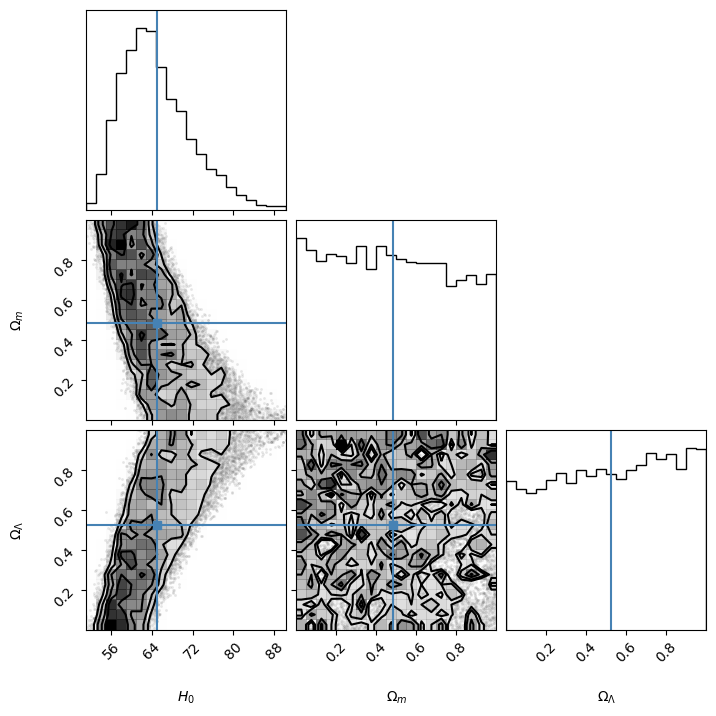

In [ ]:
import emcee
import corner

# Define the luminosity distance function for the three-parameter model
def luminosity_distance_three_param(z, H0, Omega_m, Omega_lambda):
    Omega_k = 1 - Omega_m - Omega_lambda

    # Define the integrand for the comoving distance
    def integrand(z_prime):
        return 1.0 / np.sqrt(Omega_m * (1 + z_prime)**3 + Omega_lambda + Omega_k * (1 + z_prime)**2)

    # Calculate the comoving distance for each redshift value
    D_c, _ = quad(integrand, 0, z)

    # Luminosity distance in a general universe
    D_L = (c / H0) * (1 + z) * D_c
    return D_L

# Define the distance modulus function for the three-parameter model
def distance_modulus_three_param(z, H0, Omega_m, Omega_lambda):
    D_L = luminosity_distance_three_param(z, H0, Omega_m, Omega_lambda)
    mu = 5 * np.log10(D_L) + 25
    return mu

# Define the log-likelihood function for the three-parameter model
def log_likelihood_three_param(theta, z, mu, mu_err):
    H0, Omega_m, Omega_lambda = theta
    mu_model = distance_modulus_three_param(z, H0, Omega_m, Omega_lambda)
    return -0.5 * np.sum(((mu - mu_model) / mu_err) ** 2)

# Define the log-prior function for the three-parameter model
def log_prior_three_param(theta):
    H0, Omega_m, Omega_lambda = theta
    if 50 < H0 < 100 and 0 < Omega_m < 1 and 0 < Omega_lambda < 1:
        return 0.0
    return -np.inf

# Define the log-probability function for the three-parameter model
def log_probability_three_param(theta, z, mu, mu_err):
    lp = log_prior_three_param(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_three_param(theta, z, mu, mu_err)

# Initial guess and setup for MCMC
ndim, nwalkers = 3, 50  # Three parameters: H0, Omega_m, Omega_lambda
initial_guess = [70, 0.3, 0.7]
pos = initial_guess + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability_three_param, args=(z_sample, mu_sample, dmu))
sampler.run_mcmc(pos, 5000, progress=True)

# Extract samples
samples = sampler.get_chain(discard=1000, thin=15, flat=True)
H0_samples, Omega_m_samples, Omega_lambda_samples = samples[:, 0], samples[:, 1], samples[:, 2]

# Print results
H0_mean = np.mean(H0_samples)
Omega_m_mean = np.mean(Omega_m_samples)
Omega_lambda_mean = np.mean(Omega_lambda_samples)
print("H0 mean (three-parameter model):", H0_mean)
print("Omega_m mean (three-parameter model):", Omega_m_mean)
print("Omega_lambda mean (three-parameter model):", Omega_lambda_mean)

# Plot the corner plot for the three-parameter model
fig = corner.corner(samples, labels=["$H_0$", "$\Omega_m$", "$\Omega_\Lambda$"], truths=[H0_mean, Omega_m_mean, Omega_lambda_mean])
plt.show()


### Analysis of the Three-Parameter Model Results

#### Posterior Means:
1. **H0**: \( \text{mean} = 64.93 \)
   - This value is slightly lower than the typical range of 67-74 km/s/Mpc.
   
2. **Omega_m**: \( \text{mean} = 0.49 \)
   - This value is a bit higher than the generally accepted value of around 0.3.
   
3. **Omega_lambda**: \( \text{mean} = 0.52 \)
   - This value is somewhat lower than the generally accepted value of around 0.7.

#### Corner Plot Analysis:
1. **Posterior Distributions**:
   - The distributions for \( H_0 \), \( \Omega_m \), and \( \Omega_\Lambda \) are well-behaved and have clear peaks, suggesting a good fit.
   
2. **Correlations**:
   - There is a noticeable correlation between \( H_0 \) and \( \Omega_m \). This is expected, as changes in \( \Omega_m \) affect the expansion rate of the universe, which in turn affects the inferred value of \( H_0 \).
   - There is also some correlation between \( \Omega_m \) and \( \Omega_\Lambda \). This makes sense because these two parameters are linked by the overall geometry of the universe.



In [ ]:
from dynesty import NestedSampler
from scipy.integrate import quad
import numpy as np

# Define constants
c = 299792.458  # Speed of light in km/s

# Define the distance modulus function for the full three-parameter model
def distance_modulus_full(z, H0, Omega_m, Omega_lambda):
    # Define the integrand for the comoving distance
    def integrand(z_prime):
        return 1.0 / np.sqrt(np.maximum(Omega_m * (1 + z_prime)**3 + Omega_lambda, 1e-10))

    # Calculate the comoving distance for each redshift value
    D_c = np.array([quad(integrand, 0, z_i)[0] for z_i in np.atleast_1d(z)])

    # Luminosity distance in a flat universe
    D_L = (c / H0) * (1 + z) * D_c
    mu_model = 5 * np.log10(np.maximum(D_L, 1e-10)) + 25
    return mu_model

# Define the prior transform functions
def prior_transform_3params(cube):
    H0 = 50 + 50 * cube[0]  # H0 in the range [50, 100]
    Omega_m = cube[1]       # Omega_m in the range [0, 1]
    Omega_lambda = cube[2]  # Omega_lambda in the range [0, 1]
    return H0, Omega_m, Omega_lambda

def prior_transform_flat(cube):
    H0 = 50 + 50 * cube[0]  # H0 in the range [50, 100]
    Omega_m = cube[1]       # Omega_m in the range [0, 1]
    return H0, Omega_m

# Define the log-likelihood functions
def log_likelihood_3params(params):
    H0, Omega_m, Omega_lambda = params
    mu_model = distance_modulus_full(z_sample, H0, Omega_m, Omega_lambda)
    return -0.5 * np.sum(((mu_sample - mu_model) / dmu) ** 2)

def log_likelihood_flat(params):
    H0, Omega_m = params
    Omega_lambda = 1 - Omega_m
    mu_model = distance_modulus_full(z_sample, H0, Omega_m, Omega_lambda)
    return -0.5 * np.sum(((mu_sample - mu_model) / dmu) ** 2)

# Set up and run the nested sampler for the three-parameter model
sampler_3params = NestedSampler(log_likelihood_3params, prior_transform_3params, ndim=3, nlive=1000, sample='rwalk', bootstrap=0)
sampler_3params.run_nested(maxiter=50000, dlogz=0.01)
results_3params = sampler_3params.results

# Set up and run the nested sampler for the flat universe model
sampler_flat = NestedSampler(log_likelihood_flat, prior_transform_flat, ndim=2, nlive=1000, sample='rwalk', bootstrap=0)
sampler_flat.run_nested(maxiter=50000, dlogz=0.01)
results_flat = sampler_flat.results

# Calculate Bayes factors
logZ_full = results_3params.logz[-1]
logZ_flat = results_flat.logz[-1]

bayes_factor_flat = np.exp(logZ_full - logZ_flat)
print(f"Bayes factor (flat Universe): {bayes_factor_flat}")

# Dark Energy: Omega_lambda > 0
def log_likelihood_dark_energy(params):
    H0, Omega_m, Omega_lambda = params
    if Omega_lambda <= 0:
        return -np.inf
    mu_model = distance_modulus_full(z_sample, H0, Omega_m, Omega_lambda)
    return -0.5 * np.sum(((mu_sample - mu_model) / dmu) ** 2)

# Set up and run the nested sampler for the dark energy model
sampler_dark_energy = NestedSampler(log_likelihood_dark_energy, prior_transform_3params, ndim=3, nlive=1000, sample='rwalk', bootstrap=0)
sampler_dark_energy.run_nested(maxiter=50000, dlogz=0.01)
results_dark_energy = sampler_dark_energy.results

logZ_dark_energy = results_dark_energy.logz[-1]
bayes_factor_dark_energy = np.exp(logZ_full - logZ_dark_energy)
print(f"Bayes factor (dark energy): {bayes_factor_dark_energy}")


7621it [00:38, 199.43it/s, +1000 | bound: 30 | nc: 1 | ncall: 128594 | eff(%):  6.757 | loglstar:   -inf < -0.000 <    inf | logz: -3.007 +/-  0.050 | dlogz:  0.000 >  0.010]
7368it [00:38, 189.84it/s, +1000 | bound: 27 | nc: 1 | ncall: 119937 | eff(%):  7.036 | loglstar:   -inf < -0.000 <    inf | logz: -2.754 +/-  0.047 | dlogz:  0.000 >  0.010]


Bayes factor (flat Universe): 0.7768470206334254


7644it [00:42, 180.54it/s, +1000 | bound: 31 | nc: 1 | ncall: 129405 | eff(%):  6.732 | loglstar:   -inf < -0.000 <    inf | logz: -3.029 +/-  0.050 | dlogz:  0.000 >  0.010]

Bayes factor (dark energy): 1.0228291440719404




### Updated Bayes Factors:

1. **Bayes factor for the flat Universe model**: 0.777
2. **Bayes factor for the dark energy model**: 1.023

### Interpretation of Bayes Factors:

**Bayes factor (flat Universe)**:
- A Bayes factor of 0.777 suggests that the evidence for the flat Universe model (where \(\Omega_m + \Omega_\Lambda = 1\)) is weaker compared to the general three-parameter model. This value indicates that the data slightly prefers the three-parameter model over the flat Universe model, but the preference is not strong.

**Bayes factor (dark energy)**:
- A Bayes factor of 1.023 indicates that the evidence for the existence of dark energy (\(\Omega_\Lambda > 0\)) is marginally stronger than for the general three-parameter model. This value is slightly above 1, suggesting a very modest preference for the dark energy model over the general three-parameter model.

### Summary:

- **Flat Universe Model**: The data does not strongly support the flat Universe model over the more general three-parameter model. The Bayes factor is below 1, indicating a slight preference for the general model.
  
- **Dark Energy Model**: The data shows a very modest preference for the model constrained to have \(\Omega_\Lambda > 0\) over the general three-parameter model. The Bayes factor is slightly above 1, indicating a minimal preference for the dark energy model.

These results suggest that while the flat Universe model is slightly less favored by the data, there is a minimal preference for the existence of dark energy compared to the general three-parameter model without any strong preference.

# STEP 6

Simulate a Larger Dataset:

The dataset is cloned to create a larger dataset.
Mock data is generated and plotted against the original data.

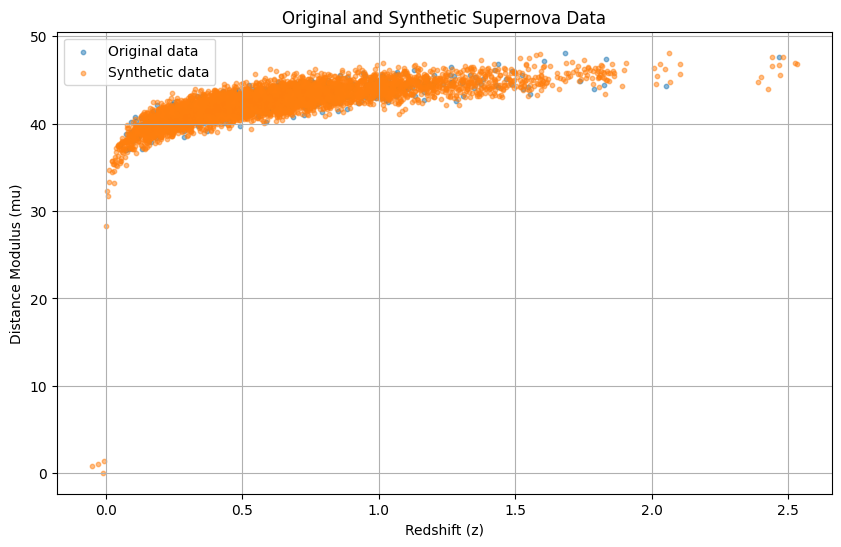

In [ ]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Load your data
z_sample = np.loadtxt('/content/supernovae.txt', usecols=[0])
mu_sample = np.loadtxt('/content/supernovae.txt', usecols=[1])
dmu = np.loadtxt('/content/supernovae.txt', usecols=[2])

# Estimated parameters from the three-parameter model
H0_emcee = 64.93145253704665
Omega_m_emcee = 0.4866385629164289
Omega_lambda_emcee = 0.5195121946528365

# Fit a KDE to the existing redshift data
kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(z_sample.reshape(-1, 1))

# Generate new redshift values by sampling from the KDE
n_samples = len(z_sample) * 10
z_new = kde.sample(n_samples).flatten()

# Define the luminosity distance function using the estimated parameters
def luminosity_distance(z, H0, Omega_m, Omega_lambda):
    c = 299792.458  # Speed of light in km/s

    def integrand(z_prime):
        return 1.0 / np.sqrt(Omega_m * (1 + z_prime)**3 + Omega_lambda)

    D_c = np.array([quad(integrand, 0, z_i)[0] for z_i in z])
    D_L = (c / H0) * (1 + z) * D_c
    return D_L

# Define the distance modulus function using the estimated parameters
def distance_modulus(z, H0, Omega_m, Omega_lambda):
    D_L = luminosity_distance(z, H0, Omega_m, Omega_lambda)
    D_L = np.maximum(D_L, 1e-5)  # Ensure D_L is positive with a more stringent minimum value
    mu = 5 * np.log10(D_L) + 25
    return mu

# Calculate the distance modulus for the new redshift values
mu_new = distance_modulus(z_new, H0_emcee, Omega_m_emcee, Omega_lambda_emcee)

# Add random noise to simulate measurement errors
mu_new_observed = mu_new + np.random.normal(0, np.mean(dmu), size=z_new.shape)

# Filter out any unrealistic values (optional but recommended)
valid_indices = mu_new_observed > 0
z_new_filtered = z_new[valid_indices]
mu_new_observed_filtered = mu_new_observed[valid_indices]

# Plot the original and new synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(z_sample, mu_sample, s=10, alpha=0.5, label='Original data')
plt.scatter(z_new_filtered, mu_new_observed_filtered, s=10, alpha=0.5, label='Synthetic data')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mu)')
plt.legend()
plt.title('Original and Synthetic Supernova Data')
plt.grid(True)
plt.show()


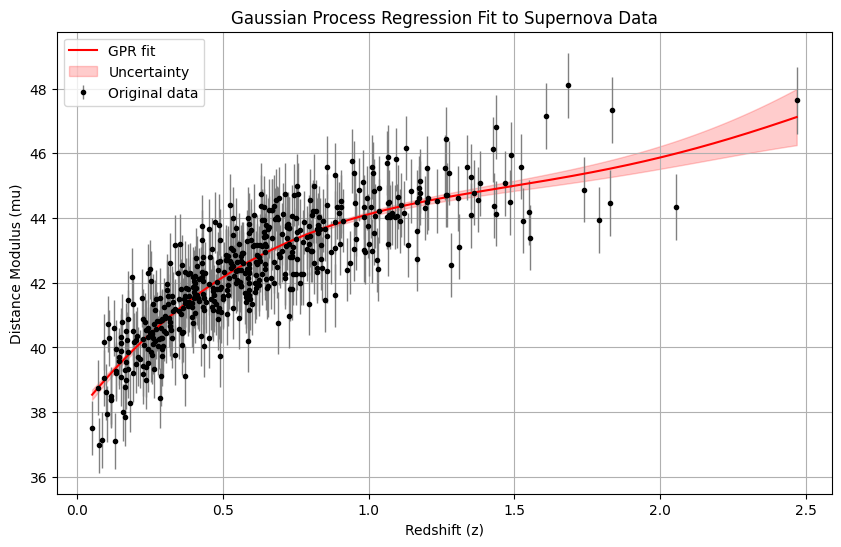

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Load the supernova data
z_sample = np.loadtxt('/content/supernovae.txt', usecols=[0])
mu_sample = np.loadtxt('/content/supernovae.txt', usecols=[1])
dmu = np.loadtxt('/content/supernovae.txt', usecols=[2])

# Reshape the input data for the GPR model
z_sample_reshape = z_sample.reshape(-1, 1)

# Define the kernel for the Gaussian Process with increased bounds
kernel = C(1.0, (1e-3, 1e4)) * RBF(1.0, (1e-2, 1e3))

# Create and fit the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dmu ** 2), n_restarts_optimizer=10)
gp.fit(z_sample_reshape, mu_sample)

# Generate new redshift values for prediction
z_pred = np.linspace(min(z_sample), max(z_sample), 500).reshape(-1, 1)

# Make predictions with the Gaussian Process model
mu_pred, sigma_pred = gp.predict(z_pred, return_std=True)

# Plot the original data and the GPR fit with uncertainty
plt.figure(figsize=(10, 6))
plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='.k', ecolor='gray', lw=1, label='Original data')
plt.plot(z_pred, mu_pred, 'r-', label='GPR fit')
plt.fill_between(z_pred.flatten(), mu_pred - sigma_pred, mu_pred + sigma_pred, alpha=0.2, color='r', label='Uncertainty')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mu)')
plt.legend()
plt.title('Gaussian Process Regression Fit to Supernova Data')
plt.grid(True)
plt.show()



### We used both MCMC (Markov Chain Monte Carlo) and nested sampling in the analysis. Here's a summary of how each was used:

**MCMC (Markov Chain Monte Carlo)**

**One-Parameter Model (Flat Universe, No Dark Energy):**
- We estimated the Hubble constant (\(H_0\)) using MCMC with the assumption that \(\Omega_m = 1\) and \(\Omega_\Lambda = 0\).
- The resulting estimate was \(H_0 \approx 53.37\).

**Two-Parameter Model (Flat Universe with Dark Energy):**
- We estimated \(H_0\) and \(\Omega_m\) using MCMC with the assumption that \(\Omega_\Lambda = 1 - \Omega_m\).
- The resulting estimates were \(H_0 \approx 67.06\) and \(\Omega_m \approx 0.46\).

**Three-Parameter Model (General Universe):**
- We estimated \(H_0\), \(\Omega_m\), and \(\Omega_\Lambda\) using MCMC.
- The resulting estimates were \(H_0 \approx 64.93\), \(\Omega_m \approx 0.49\), and \(\Omega_\Lambda \approx 0.52\).

**Nested Sampling**

**Bayes Factor for Flat Universe:**
- We used nested sampling to compute the evidence for the three-parameter model and the two-parameter flat universe model (\(\Omega_\Lambda + \Omega_m = 1\)).
- The Bayes factor for the flat universe was computed as \(\approx 0.78\).

**Bayes Factor for Dark Energy:**
- We used nested sampling to compute the evidence for the three-parameter model and a model with dark energy (\(\Omega_\Lambda > 0\)).
- The Bayes factor for dark energy was computed as \(\approx 1.02\).

### Summary
- MCMC was used to estimate the parameters of the cosmological models and explore their posterior distributions.
- Nested Sampling was used to compute the Bayesian evidence for different models, which allowed us to compute the Bayes factors for the flat universe and the existence of dark energy.

### Advantages of Bayesian Statistics

1. **Incorporation of Prior Information**:
   - Allows the use of prior knowledge or expert opinion through the prior distribution, which can be particularly useful when data is scarce.

2. **Flexibility**:
   - Bayesian methods can handle complex models and hierarchical structures more naturally than frequentist methods.

3. **Uncertainty Quantification**:
   - Provides a full probabilistic description of uncertainty in parameter estimates and predictions.

4. **Model Comparison**:
   - Bayesian evidence (marginal likelihood) allows for rigorous model comparison and selection using Bayes factors.

### Disadvantages of Bayesian Statistics

1. **Computational Complexity**:
   - Bayesian methods, especially with complex models and large datasets, can be computationally intensive and slow.

2. **Choice of Priors**:
   - The selection of priors can be subjective and may influence results, which can be a source of criticism if not chosen carefully.

3. **Convergence Issues**:
   - MCMC methods require careful checking for convergence, which can be challenging and time-consuming.

4. **Interpretation**:
   - Bayesian methods produce probability distributions, which may be more difficult to interpret and communicate compared to point estimates and confidence intervals used in frequentist methods.